This is an analysis of Divvy Bicycle Sharing trip dataset that can be accessed from https://divvy-tripdata.s3.amazonaws.com/index.html

Divvy Bikes is a bike sharing company based in Chicago that provides locals and tourists an option to travel the city of Chicago. Recently, the financial analysts had found that riders who own memberships are more profitable than their casual counterparts. Hence, it is desirable to convert as many casual riders as possible to become members in order to maximize profits.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
divvy202101 = pd.read_csv("202101-divvy-tripdata.csv")
divvy202102 = pd.read_csv("202102-divvy-tripdata.csv")
divvy202103 = pd.read_csv("202103-divvy-tripdata.csv")
divvy202104 = pd.read_csv("202104-divvy-tripdata.csv")
divvy202105 = pd.read_csv("202105-divvy-tripdata.csv")
divvy202106 = pd.read_csv("202106-divvy-tripdata.csv")
divvy202107 = pd.read_csv("202107-divvy-tripdata.csv")
divvy202108 = pd.read_csv("202108-divvy-tripdata.csv")
divvy202109 = pd.read_csv("202109-divvy-tripdata.csv")
divvy202110 = pd.read_csv("202110-divvy-tripdata.csv")
divvy202111 = pd.read_csv("202111-divvy-tripdata.csv")
divvy202112 = pd.read_csv("202112-divvy-tripdata.csv")

In [3]:
annual = [divvy202101, divvy202102, divvy202103, divvy202104, divvy202105, divvy202106, divvy202107, divvy202108, divvy202109,divvy202110, divvy202111, divvy202112]

df = pd.concat(annual)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5595063 entries, 0 to 247539
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(4), object(9)
memory usage: 597.6+ MB


In [5]:
df.isnull().sum()

ride_id                    0
rideable_type              0
started_at                 0
ended_at                   0
start_station_name    690809
start_station_id      690806
end_station_name      739170
end_station_id        739170
start_lat                  0
start_lng                  0
end_lat                 4771
end_lng                 4771
member_casual              0
dtype: int64

There are quite a lot of missing values. However, seeing that those columns may not be needed for this analysis, it is safe to drop those columns entirely. 

In [6]:
df = df.drop(columns=['start_station_name', 'start_station_id', 'end_station_name', 'end_station_id', 
                      'start_lat', 'start_lng', 'end_lat', 'end_lng'])

member    3066058
casual    2529005
Name: member_casual, dtype: int64

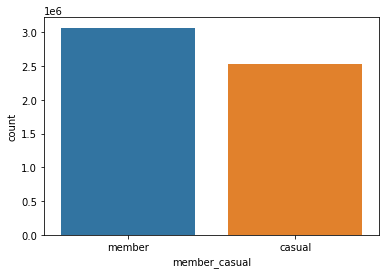

In [8]:
ax = sns.countplot(x='member_casual', data=df)
df['member_casual'].value_counts()

In [9]:
df['started_at'] = pd.to_datetime(df['started_at'])
df['ended_at'] = pd.to_datetime(df['ended_at'])

In [10]:
df['day'] = df['started_at'].dt.day_name()
df['day_of_week'] = df['started_at'].dt.dayofweek
df = df.sort_values(by=['day_of_week'])

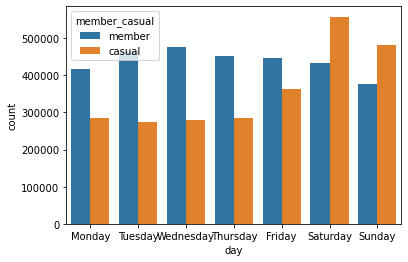

In [11]:
ax = sns.countplot(x='day', hue='member_casual', data=df)

The chart above shows a striking trend between casual and members rides. During weekdays, members consistently ride more than casuals, but this trend does not happen during weekends. One conclusion that can be made from this information alone is that the casuals mainly ride for leisure purpose, as indicated by a little spike in Friday followed by a peak in Saturday. Based on this, the company could try to market the Divvy Bikes as the main transportation mode, so that the casual would use the bike for their daily activities (e.g. going to work). As such, the ads can be placed near train stations and bus stops so that it targets the right demography.